<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
ind = np.random.randint(1, 9245527, 5500000)

In [7]:
df_std = df.iloc[ind,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
7020358,1.0,2220000.00,0.0,OTROS,UNIVERSITARIO,Empleado,6,CASADO,B,F,...,6,202002,1,3000000.0,2,199420000.0,0.0,PEDRAZA,26,315676.97
4311720,2.0,2250412.00,0.0,CONTADURIA,UNIVERSITARIO,Otro,7,SOLTERO,D,M,...,3,202008,1,10000000.0,8,0.0,0.0,EL PLAN,67,162920.00
4845134,1.0,2982672.00,0.0,CONTADURIA,UNIVERSITARIO,Empleado,6,CASADO,A,M,...,3,202004,1,7950000.0,4,86000.0,0.0,CALAMAR,47,820110.00
5401255,2.0,828116.00,0.0,INGENIERO,UNIVERSITARIO,Empleado,6,SOLTERO,C,M,...,3,202007,0,0.0,7,82000.0,0.0,PEDRAZA,39,668988.49
5562272,1.0,2107560.00,1000000.0,DECORADORES Y DISEÑADORES COMERCIALES,TECNOLOGO,Empleado,6,SOLTERO,A,M,...,4,202004,1,8200000.0,4,0.0,0.0,PUERRES,36,254560.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923963,2.0,4865166.00,3364084.0,INGENIERIA MECANICA,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,3,202001,1,26600000.0,1,63000.0,0.0,ARBOLEDAS,28,822200.83
8646446,1.0,1197240.00,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,B,M,...,1,202010,0,0.0,10,0.0,0.0,MONTERREY,29,221061.00
6188419,1.0,1161033.65,1137863.0,NINGUNA,TECNOLOGO,Empleado,6,CASADO,D,F,...,4,201905,1,2500000.0,5,4559000.0,0.0,NARINO,51,0.00
6690942,1.0,3860080.00,6183324.0,MERCADOTECNIA,UNIVERSITARIO,Empleado,6,SOLTERO,B,F,...,5,201902,1,4100000.0,2,29996000.0,0.0,CUCUTA,48,17800.00


## One-Hot Encoding

In [8]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [9]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
7020358,1.0,2220000.00,0.0,6,1,1,7,1,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4311720,2.0,2250412.00,0.0,7,1,1,3,2,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4845134,1.0,2982672.00,0.0,6,1,1,8,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
5401255,2.0,828116.00,0.0,6,1,1,5,2,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
5562272,1.0,2107560.00,1000000.0,6,1,1,8,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923963,2.0,4865166.00,3364084.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8646446,1.0,1197240.00,0.0,6,1,1,7,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6188419,1.0,1161033.65,1137863.0,6,1,1,3,1,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6690942,1.0,3860080.00,6183324.0,6,1,1,7,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    8771968
dtype: int64

## Best Variables

In [11]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:7]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar']

In [12]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
                     'gasto_familiar']

In [13]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,gasto_familiar
7020358,1.0,2220000.00,0.0,6,1,1,7,315676.97
4311720,2.0,2250412.00,0.0,7,1,1,3,162920.00
4845134,1.0,2982672.00,0.0,6,1,1,8,820110.00
5401255,2.0,828116.00,0.0,6,1,1,5,668988.49
5562272,1.0,2107560.00,1000000.0,6,1,1,8,254560.00
...,...,...,...,...,...,...,...,...
6923963,2.0,4865166.00,3364084.0,6,1,1,8,822200.83
8646446,1.0,1197240.00,0.0,6,1,1,7,221061.00
6188419,1.0,1161033.65,1137863.0,6,1,1,3,0.00
6690942,1.0,3860080.00,6183324.0,6,1,1,7,17800.00


## Normalization

In [14]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,5500000.0,0.30,0.13,0.0,0.20,0.20,0.40,1.0
1,5500000.0,0.01,0.02,0.0,0.01,0.01,0.02,1.0
2,5500000.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,5500000.0,0.53,0.18,0.0,0.56,0.56,0.56,1.0
4,5500000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,5500000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,5500000.0,0.60,0.36,0.0,0.29,0.57,1.00,1.0
7,5500000.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0


In [15]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [16]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 7)
(281666,)
(5218334,)


## Train_Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6
1753259,0.4,0.051838,0.000000,0.555556,0.0,0.0,1.000000
1480241,0.4,0.007404,0.000000,0.777778,0.0,0.0,0.000000
691683,0.4,0.016927,0.000000,0.555556,0.0,0.0,0.571429
3049208,0.2,0.007045,0.000000,0.111111,0.0,0.0,1.000000
3267615,0.4,0.015988,0.000000,0.555556,0.0,0.0,1.000000
...,...,...,...,...,...,...,...
4864577,0.4,0.003477,0.000000,0.555556,0.0,0.0,0.142857
4030375,0.4,0.011922,0.000000,0.777778,0.0,0.0,0.571429
5170376,0.2,0.008691,0.000000,0.555556,0.0,0.0,0.000000
1063538,0.2,0.008063,0.006001,0.555556,0.0,0.0,0.857143


In [18]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [19]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(100, input_dim=7, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 31,201
Trainable params: 31,201
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [22]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [23]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

48922/48922 [==============================] - 38s 777us/step - loss: 6.1779e-06 - mean_absolute_percentage_error: 58053.8477
loss :  6.17789419266046e-06
mean_absolute_percentage_error :  58053.84765625


## Submission

In [24]:
y_hat = model.predict(x_val)
y_hat

array([[0.00118042],
       [0.00070616],
       [0.00156311],
       ...,
       [0.00052342],
       [0.00092369],
       [0.00050056]], dtype=float32)

In [25]:
y_val

array([3.07116856e-04, 1.33690570e-03, 9.05862440e-04, ...,
       0.00000000e+00, 3.09623414e-05, 6.60993806e-05])

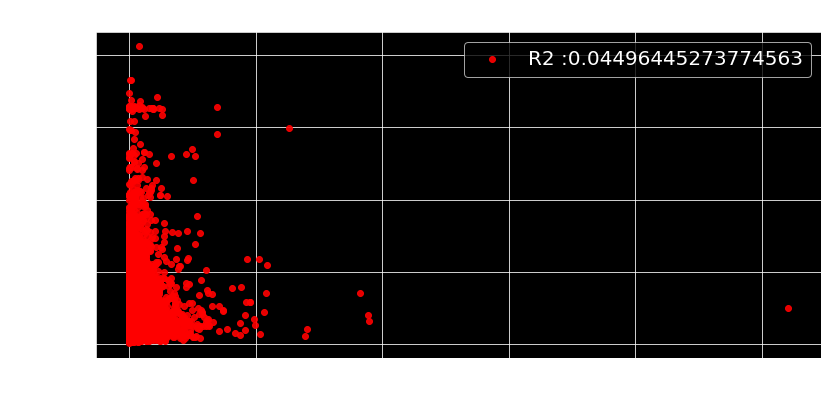

In [26]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [27]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.4,0.011430,0.000000,0.555556,0.0,0.0,0.857143,0.001180
1,0.2,0.003617,0.006806,0.777778,0.0,0.0,0.857143,0.000706
2,0.4,0.023476,0.004716,0.555556,0.0,0.0,0.571429,0.001563
3,0.2,0.006318,0.004792,0.555556,0.0,0.0,0.857143,0.000648
4,0.2,0.012664,0.004039,0.555556,0.0,0.0,0.428571,0.000788
...,...,...,...,...,...,...,...,...
281661,0.4,0.014294,0.007235,0.555556,0.0,0.0,1.000000,0.001382
281662,0.2,0.003517,0.000000,0.555556,0.0,0.0,0.857143,0.000493
281663,0.2,0.003411,0.002447,0.555556,0.0,0.0,0.285714,0.000523
281664,0.2,0.011341,0.013297,0.555556,0.0,0.0,0.857143,0.000924


In [28]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         678612.277959
1         405962.922216
2         898620.139623
3         372308.332161
4         452950.622386
              ...      
281661    794482.593864
281662    283317.865006
281663    300909.959507
281664    531024.618602
281665    287769.262298
Name: 7, Length: 281666, dtype: float64

In [29]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,678612.277959
1,12598#201902,405962.922216
2,23697#201902,898620.139623
3,23768#201902,372308.332161
4,7174#201902,452950.622386
...,...,...
281661,8596193#202011,794482.593864
281662,8616083#202011,283317.865006
281663,8670207#202011,300909.959507
281664,8677655#202011,531024.618602


In [30]:
n = 120
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN120.csv'

In [31]:
np.mean(sub['gasto_familiar'])

591586.5749067822

In [32]:
sub.to_csv(sub_name, index=False)

# Test 1

In [33]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

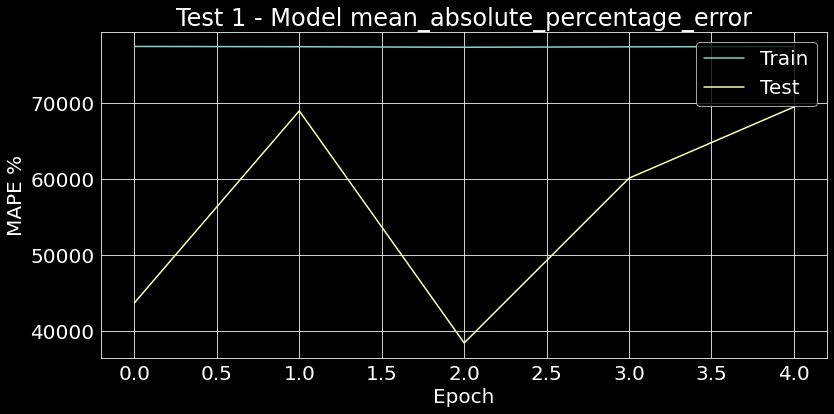

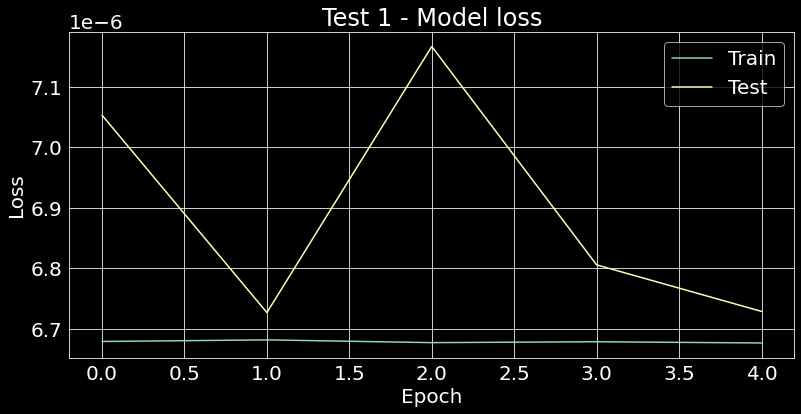

In [34]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

48922/48922 [==============================] - 38s 780us/step - loss: 6.0889e-06 - mean_absolute_percentage_error: 68069.0625
loss :  6.088940153858857e-06
mean_absolute_percentage_error :  68069.0625


# Submission

In [36]:
y_hat = model.predict(x_val)
y_hat

array([[0.00128111],
       [0.00090659],
       [0.00162239],
       ...,
       [0.00080276],
       [0.00113907],
       [0.00078502]], dtype=float32)

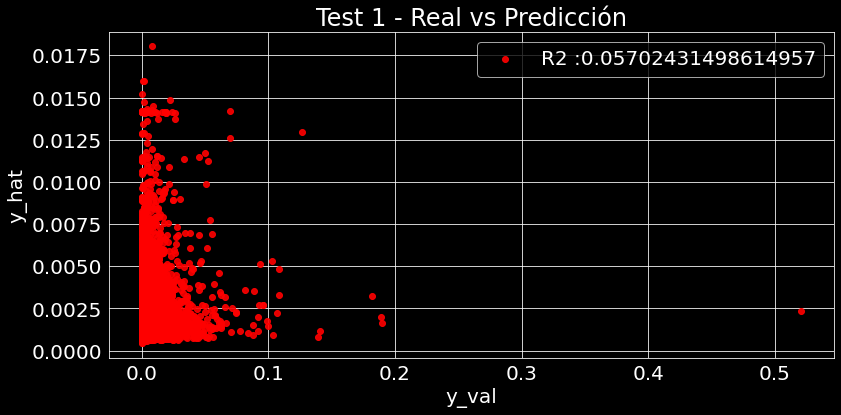

In [37]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [38]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.4,0.011430,0.000000,0.555556,0.0,0.0,0.857143,0.001281
1,0.2,0.003617,0.006806,0.777778,0.0,0.0,0.857143,0.000907
2,0.4,0.023476,0.004716,0.555556,0.0,0.0,0.571429,0.001622
3,0.2,0.006318,0.004792,0.555556,0.0,0.0,0.857143,0.000894
4,0.2,0.012664,0.004039,0.555556,0.0,0.0,0.428571,0.001026
...,...,...,...,...,...,...,...,...
281661,0.4,0.014294,0.007235,0.555556,0.0,0.0,1.000000,0.001457
281662,0.2,0.003517,0.000000,0.555556,0.0,0.0,0.857143,0.000756
281663,0.2,0.003411,0.002447,0.555556,0.0,0.0,0.285714,0.000803
281664,0.2,0.011341,0.013297,0.555556,0.0,0.0,0.857143,0.001139


In [39]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         736499.717511
1         521192.553338
2         932697.168031
3         513853.423150
4         590012.927681
              ...      
281661    837514.820092
281662    434786.777117
281663    461501.318083
281664    654844.766527
281665    451304.170245
Name: 7, Length: 281666, dtype: float64

In [40]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,736499.717511
1,12598#201902,521192.553338
2,23697#201902,932697.168031
3,23768#201902,513853.423150
4,7174#201902,590012.927681
...,...,...
281661,8596193#202011,837514.820092
281662,8616083#202011,434786.777117
281663,8670207#202011,461501.318083
281664,8677655#202011,654844.766527


In [41]:
n = 121
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN121.csv'

In [42]:
np.mean(sub['gasto_familiar'])

689609.0583637977

In [43]:
sub.to_csv(sub_name, index=False)

# Test 2

In [44]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


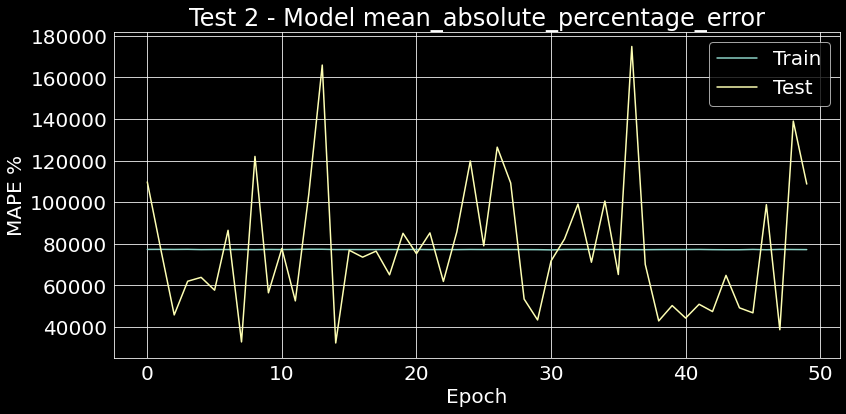

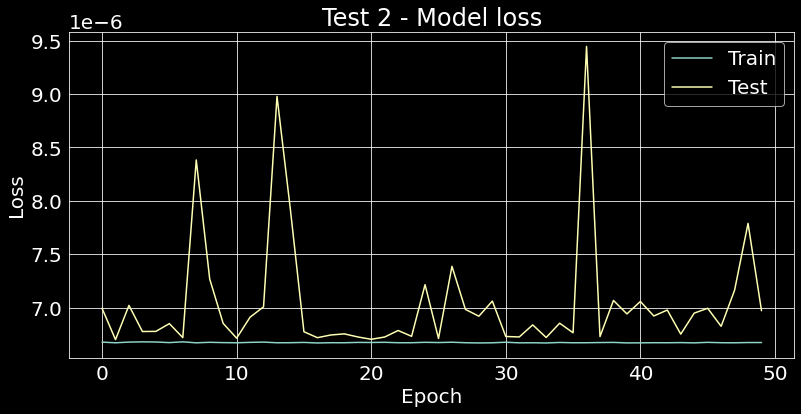

In [45]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [46]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

48922/48922 [==============================] - 37s 764us/step - loss: 6.3352e-06 - mean_absolute_percentage_error: 106800.2188
loss :  6.335195848805597e-06
mean_absolute_percentage_error :  106800.21875


# Submission

In [47]:
y_hat = model.predict(x_val)
y_hat

array([[0.00200149],
       [0.00157069],
       [0.00232528],
       ...,
       [0.00143548],
       [0.00178961],
       [0.00141337]], dtype=float32)

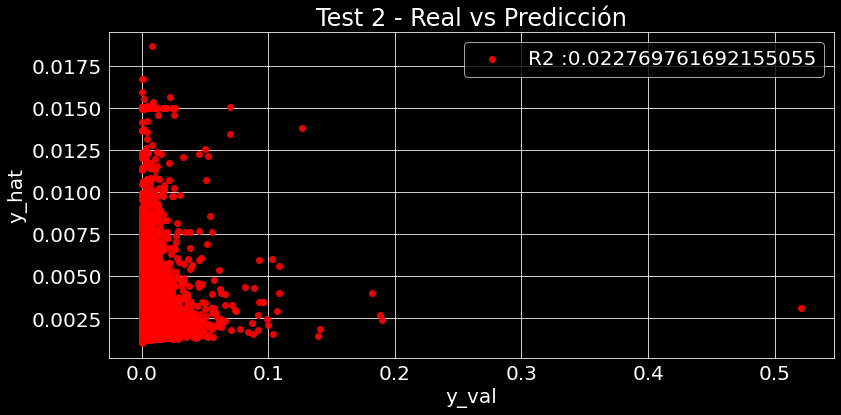

In [49]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [50]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.4,0.011430,0.000000,0.555556,0.0,0.0,0.857143,0.002001
1,0.2,0.003617,0.006806,0.777778,0.0,0.0,0.857143,0.001571
2,0.4,0.023476,0.004716,0.555556,0.0,0.0,0.571429,0.002325
3,0.2,0.006318,0.004792,0.555556,0.0,0.0,0.857143,0.001553
4,0.2,0.012664,0.004039,0.555556,0.0,0.0,0.428571,0.001666
...,...,...,...,...,...,...,...,...
281661,0.4,0.014294,0.007235,0.555556,0.0,0.0,1.000000,0.002177
281662,0.2,0.003517,0.000000,0.555556,0.0,0.0,0.857143,0.001420
281663,0.2,0.003411,0.002447,0.555556,0.0,0.0,0.285714,0.001435
281664,0.2,0.011341,0.013297,0.555556,0.0,0.0,0.857143,0.001790


In [51]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.150639e+06
1         9.029748e+05
2         1.336787e+06
3         8.925675e+05
4         9.575010e+05
              ...     
281661    1.251577e+06
281662    8.161662e+05
281663    8.252470e+05
281664    1.028833e+06
281665    8.125323e+05
Name: 7, Length: 281666, dtype: float64

In [52]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.150639e+06
1,12598#201902,9.029748e+05
2,23697#201902,1.336787e+06
3,23768#201902,8.925675e+05
4,7174#201902,9.575010e+05
...,...,...
281661,8596193#202011,1.251577e+06
281662,8616083#202011,8.161662e+05
281663,8670207#202011,8.252470e+05
281664,8677655#202011,1.028833e+06


In [53]:
n = 122
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN122.csv'

In [54]:
np.mean(sub['gasto_familiar'])

1077778.9521944849

In [55]:
sub.to_csv(sub_name, index=False)

# Test 3

In [56]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


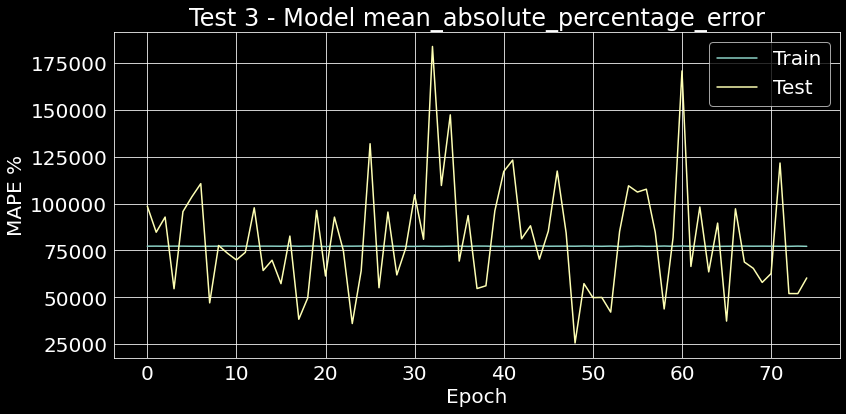

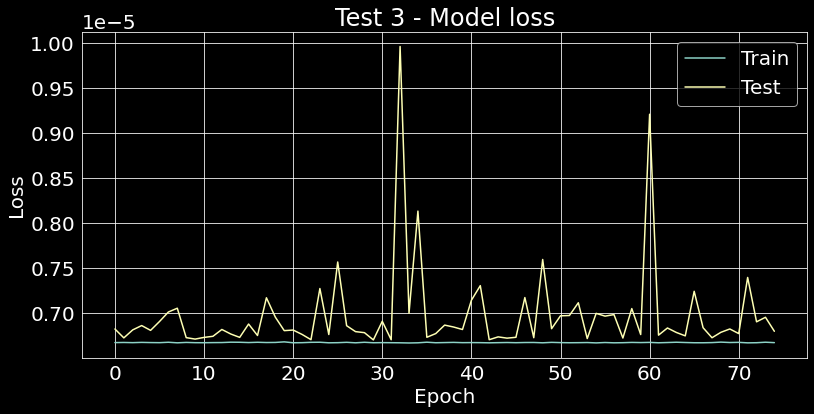

In [57]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [58]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

48922/48922 [==============================] - 37s 762us/step - loss: 6.1575e-06 - mean_absolute_percentage_error: 59171.7383
loss :  6.157468305900693e-06
mean_absolute_percentage_error :  59171.73828125


## Submission

In [59]:
y_hat = model.predict(x_val)
y_hat

array([[0.00118086],
       [0.00078233],
       [0.00147781],
       ...,
       [0.0006197 ],
       [0.00098423],
       [0.00059067]], dtype=float32)

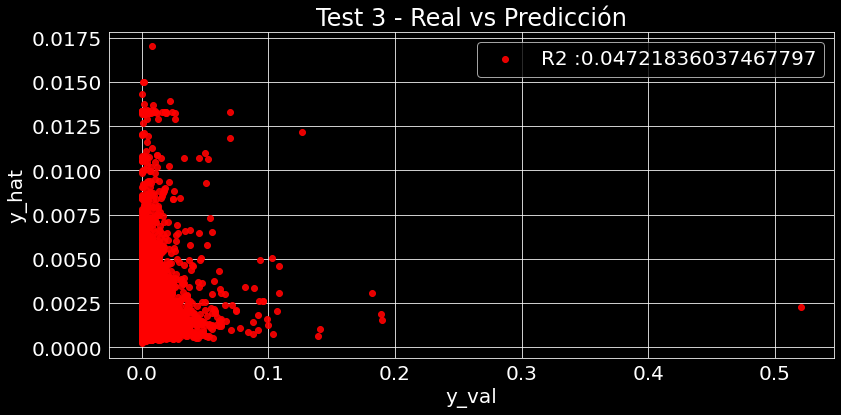

In [60]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [61]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.4,0.011430,0.000000,0.555556,0.0,0.0,0.857143,0.001181
1,0.2,0.003617,0.006806,0.777778,0.0,0.0,0.857143,0.000782
2,0.4,0.023476,0.004716,0.555556,0.0,0.0,0.571429,0.001478
3,0.2,0.006318,0.004792,0.555556,0.0,0.0,0.857143,0.000752
4,0.2,0.012664,0.004039,0.555556,0.0,0.0,0.428571,0.000841
...,...,...,...,...,...,...,...,...
281661,0.4,0.014294,0.007235,0.555556,0.0,0.0,1.000000,0.001359
281662,0.2,0.003517,0.000000,0.555556,0.0,0.0,0.857143,0.000622
281663,0.2,0.003411,0.002447,0.555556,0.0,0.0,0.285714,0.000620
281664,0.2,0.011341,0.013297,0.555556,0.0,0.0,0.857143,0.000984


In [62]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         678864.857544
1         449753.121443
2         849583.225272
3         432584.703430
4         483417.014243
              ...      
281661    781266.136165
281662    357861.301904
281663    356262.635090
281664    565826.056503
281665    339570.597970
Name: 7, Length: 281666, dtype: float64

In [63]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,678864.857544
1,12598#201902,449753.121443
2,23697#201902,849583.225272
3,23768#201902,432584.703430
4,7174#201902,483417.014243
...,...,...
281661,8596193#202011,781266.136165
281662,8616083#202011,357861.301904
281663,8670207#202011,356262.635090
281664,8677655#202011,565826.056503


In [64]:
n = 123
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN123.csv'

In [65]:
np.mean(sub['gasto_familiar'])

602308.5337789858

In [66]:
sub.to_csv(sub_name, index=False)

# Test 4

In [67]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


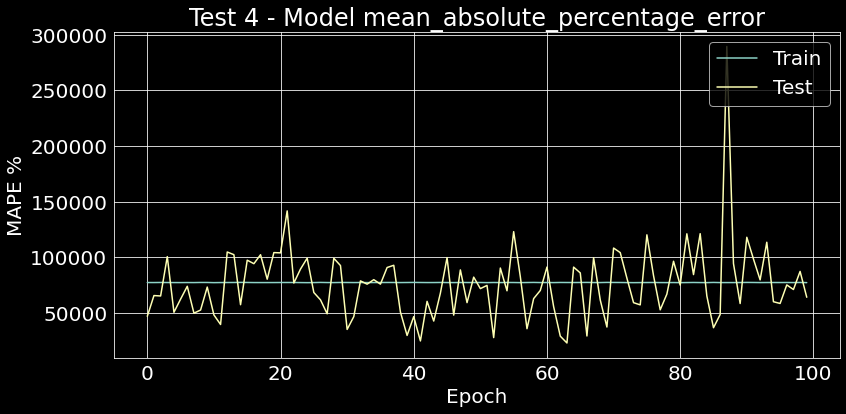

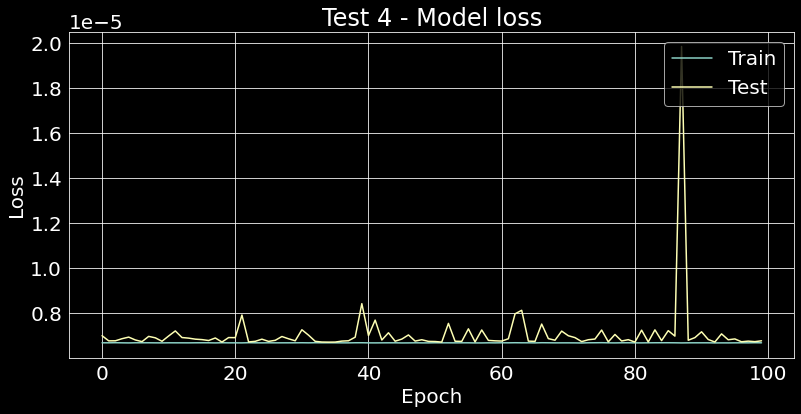

In [68]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [69]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

48922/48922 [==============================] - 37s 763us/step - loss: 6.1227e-06 - mean_absolute_percentage_error: 62734.4375
loss :  6.1227360674820375e-06
mean_absolute_percentage_error :  62734.4375


## Submission

In [70]:
y_hat = model.predict(x_val)
y_hat

array([[0.00123181],
       [0.00081625],
       [0.00155491],
       ...,
       [0.00067719],
       [0.00103167],
       [0.00065373]], dtype=float32)

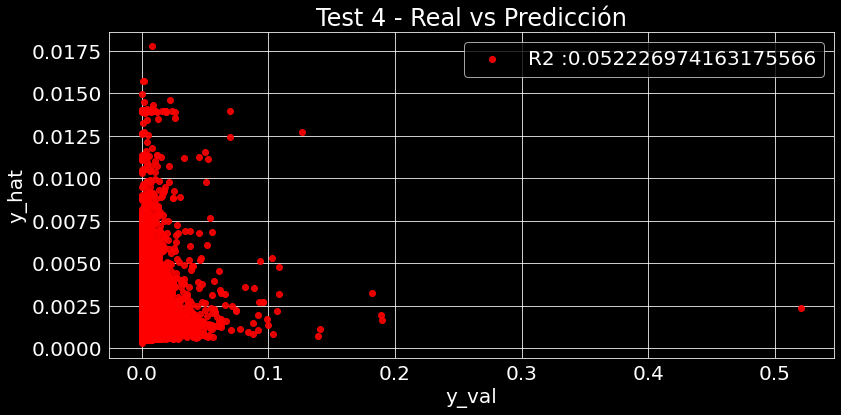

In [71]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [72]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.4,0.011430,0.000000,0.555556,0.0,0.0,0.857143,0.001232
1,0.2,0.003617,0.006806,0.777778,0.0,0.0,0.857143,0.000816
2,0.4,0.023476,0.004716,0.555556,0.0,0.0,0.571429,0.001555
3,0.2,0.006318,0.004792,0.555556,0.0,0.0,0.857143,0.000791
4,0.2,0.012664,0.004039,0.555556,0.0,0.0,0.428571,0.000903
...,...,...,...,...,...,...,...,...
281661,0.4,0.014294,0.007235,0.555556,0.0,0.0,1.000000,0.001410
281662,0.2,0.003517,0.000000,0.555556,0.0,0.0,0.857143,0.000656
281663,0.2,0.003411,0.002447,0.555556,0.0,0.0,0.285714,0.000677
281664,0.2,0.011341,0.013297,0.555556,0.0,0.0,0.857143,0.001032


In [73]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         708158.534567
1         469256.695948
2         893906.123812
3         454630.269936
4         519009.754404
              ...      
281661    810839.497896
281662    376978.845925
281663    389311.877411
281664    593098.092950
281665    375824.602730
Name: 7, Length: 281666, dtype: float64

In [74]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,708158.534567
1,12598#201902,469256.695948
2,23697#201902,893906.123812
3,23768#201902,454630.269936
4,7174#201902,519009.754404
...,...,...
281661,8596193#202011,810839.497896
281662,8616083#202011,376978.845925
281663,8670207#202011,389311.877411
281664,8677655#202011,593098.092950


In [75]:
n = 124
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN124.csv'

In [76]:
np.mean(sub['gasto_familiar'])

637129.6229619974

In [77]:
sub.to_csv(sub_name, index=False)

# Test 5

In [78]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



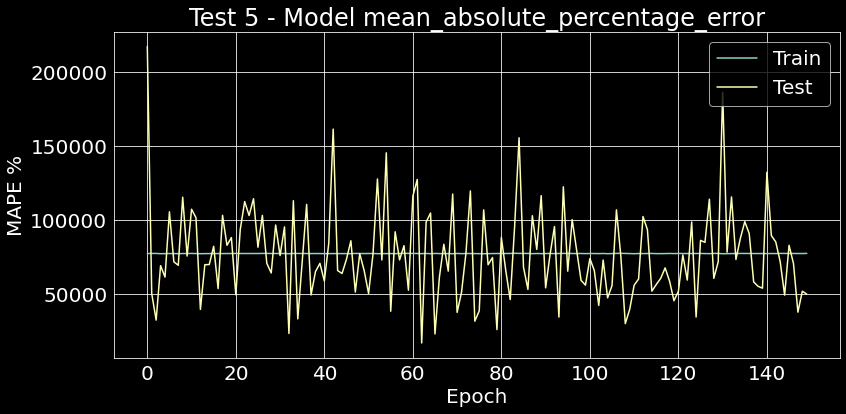

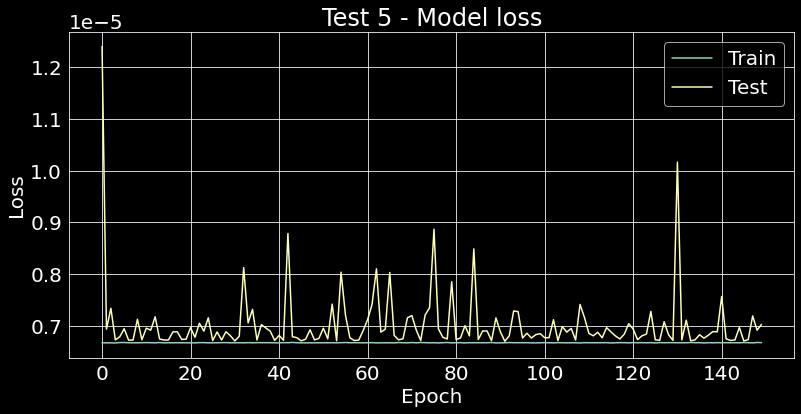

In [79]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [80]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

48922/48922 [==============================] - 37s 762us/step - loss: 6.3786e-06 - mean_absolute_percentage_error: 48841.7344
loss :  6.37858101981692e-06
mean_absolute_percentage_error :  48841.734375


# Submission

In [81]:
y_hat = model.predict(x_val)
y_hat

array([[0.00093636],
       [0.00069875],
       [0.00112495],
       ...,
       [0.00060246],
       [0.00082321],
       [0.00058597]], dtype=float32)

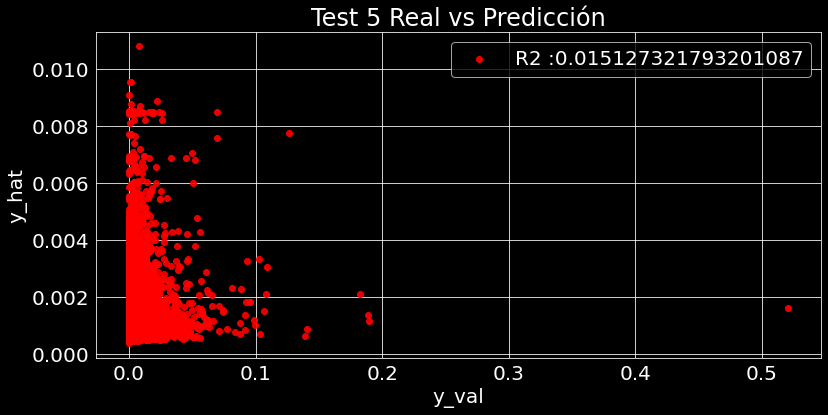

In [82]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [83]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.4,0.011430,0.000000,0.555556,0.0,0.0,0.857143,0.000936
1,0.2,0.003617,0.006806,0.777778,0.0,0.0,0.857143,0.000699
2,0.4,0.023476,0.004716,0.555556,0.0,0.0,0.571429,0.001125
3,0.2,0.006318,0.004792,0.555556,0.0,0.0,0.857143,0.000678
4,0.2,0.012664,0.004039,0.555556,0.0,0.0,0.428571,0.000739
...,...,...,...,...,...,...,...,...
281661,0.4,0.014294,0.007235,0.555556,0.0,0.0,1.000000,0.001046
281662,0.2,0.003517,0.000000,0.555556,0.0,0.0,0.857143,0.000597
281663,0.2,0.003411,0.002447,0.555556,0.0,0.0,0.285714,0.000602
281664,0.2,0.011341,0.013297,0.555556,0.0,0.0,0.857143,0.000823


In [84]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         538304.786782
1         401704.071683
2         646722.599469
3         390055.160102
4         424632.462065
              ...      
281661    601290.398696
281662    343393.122959
281663    346349.120607
281664    473258.917859
281665    336869.154231
Name: 7, Length: 281666, dtype: float64

In [85]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,538304.786782
1,12598#201902,401704.071683
2,23697#201902,646722.599469
3,23768#201902,390055.160102
4,7174#201902,424632.462065
...,...,...
281661,8596193#202011,601290.398696
281662,8616083#202011,343393.122959
281663,8670207#202011,346349.120607
281664,8677655#202011,473258.917859


In [86]:
n = 125
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN125.csv'

In [87]:
np.mean(sub['gasto_familiar'])

494955.2565088704

In [89]:
sub.to_csv(sub_name, index=False)